<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reg Linear

In [80]:
import pandas as pd
import statsmodels.api as sm
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/notas-rl%20-%20test.csv')
ap1_ap2 = sm.add_constant(treino[['AP1','AP2']])
rl = sm.OLS(treino['AP3'] , ap1_ap2).fit()
rl.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AP3   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1003.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           5.91e-33
Time:                        23:59:26   Log-Likelihood:                -18.207
No. Observations:                  40   AIC:                             42.41
Df Residuals:                      37   BIC:                             47.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8258      0.265     -3.111      0.004      -1.364      -0.288
AP1           -0.3661      0.030    -12.318      0.000      -0.426      -0.306
AP2            1.3834      0.031     44.788      0.000       1.321       1.446
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.534
Skew:                           0.642   Prob(JB):                        0.171
Kurtosis:                       2.314   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Reg Logistica

In [91]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
X_treino, X_teste, y_treino, y_teste = train_test_split(dados[['ALTURA','PESO']],dados['SEXO'] ,test_size=0.2)
Xs = sm.add_constant(X_treino)
rl0 = sm.Logit(y_treino, Xs).fit()
rl0.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.226000
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,21.787614,0.510320,42.694030,0.0,20.787406,22.787823
PESO,-0.297672,0.006953,-42.814635,0.0,-0.311299,-0.284046


# Arv Decisao

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
X_treino, X_teste, y_treino, y_teste = train_test_split(dados[['ALTURA','PESO']],dados['SEXO'] ,test_size=0.2)
arv = DecisionTreeClassifier(max_depth=3)
arv.fit(X_treino,y_treino)
acuracia_treino = arv.score(X_treino,y_treino)
acuracia_treino*100

91.3

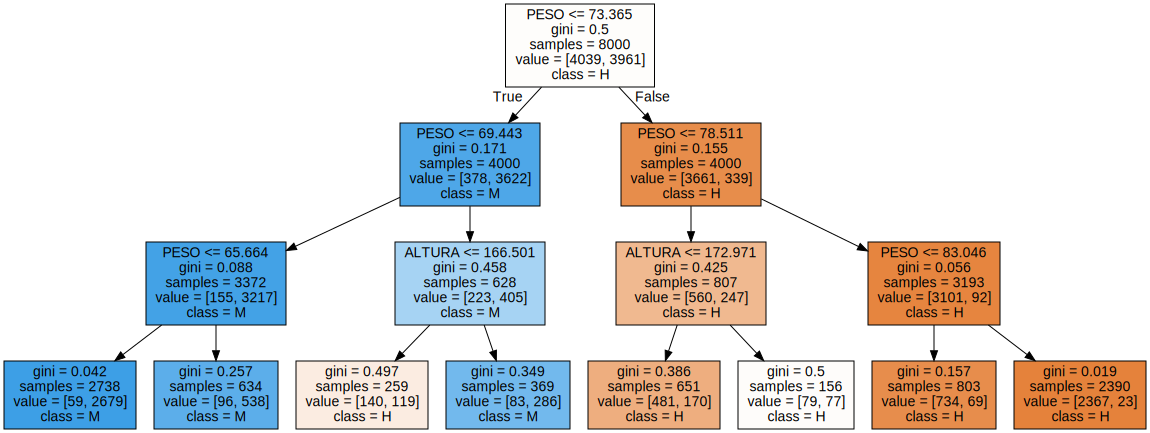

In [93]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv,filled=True,
                           feature_names=['ALTURA','PESO'], 
                           class_names=['H','M'])
grafico = Source(dot_data)
grafico

# H2O

In [84]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 4 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_g1bv0v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.581 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


![](https://miro.medium.com/max/1400/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

In [86]:
from h2o.estimators import H2ORandomForestEstimator
dados = h2o.import_file("https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv")
dados['SEXO'] = dados['SEXO'].asfactor()
treino, teste = dados.split_frame(ratios=[0.8])
tree =H2ORandomForestEstimator(max_depth=3)
tree.train(['ALTURA','PESO'],'SEXO',treino)
tree.model_performance(teste) 


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.07273483040862533
RMSE: 0.2696939569375356
LogLoss: 0.2519867776818791
Mean Per-Class Error: 0.09044102003612593
AUC: 0.9612855992691381
AUCPR: 0.9517865805803014
Gini: 0.9225711985382763

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6133958786725998
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      916   87   0.0867   (87.0/1003.0)
1      90    866  0.0941   (90.0/956.0)
Total  1006  953  0.0904   (177.0/1959.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.613396     0.907281  194
max f2                       0.279677     0.932965  254
max f0point5                 0.827093     0.920608  108
max accuracy                 0.63032      0.909648  188
max precision                0.970578     0.979452  0
max recall                   0.0241308    1         390
max specificity              0.970578     0.997009  0
max absolute_mcc             0.63032      0.81924   188
max min_per_class_accuracy   0.592819     0.90795   198
max mean_per_class_accuracy  0.613396     0.909559  194
max tns                      0.970578     1000      0
max fns                      0.970578     813       0
max fps                      0.0140507    1003      399
max tps                      0.0241308    956       390
max tnr                      0.970578     0.997009  0
max fnr                      0.970578     0.850418  0
max fpr                      0.0140507    1         399
max tpr                      0.0241308    1         390

Gains/Lift Table: Avg response rate: 48.80 %, avg score: 48.87 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0745278                   0.970578           2.00706    2.00706            0.979452         0.970578   0.979452                    0.970578            0.149582        0.149582                   100.706   100.706            0.146591
2        0.101072                    0.966097           1.93094    1.98707            0.942308         0.966663   0.969697                    0.96955             0.0512552       0.200837                   93.0942   98.7067            0.194855
3        0.15416                     0.95067            2.02946    2.00167            0.990385         0.956661   0.976821                    0.965111            0.107741        0.308577                   102.946   100.167            0.301598
4        0.205717                    0.946997           1.9883     1.99832            0.970297         0.949079   0.975186                    0.961093            0.10251         0.411088                   98.8297   99.8315            0.401118
5        0.300153                    0.899467           1.9384     1.97946            0.945946         0.925751   0.965986                    0.949974            0.183054        0.594142                   93.8398   97.9464            0.574202
6        0.400715                    0.840711           1.90354    1.96041            0.928934         0.864889   0.956688                    0.928621            0.191423        0.785565                   90.3537   96.041             0.751667
7        0.502808                    0.556894           1.28073    1.8224             0.625            0.691998   0.88934                     0.880576            0.130753        0.916318                   28.0727   82.2403            0.807644
8        0.601838            

![](https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg)

## Crossvalidation

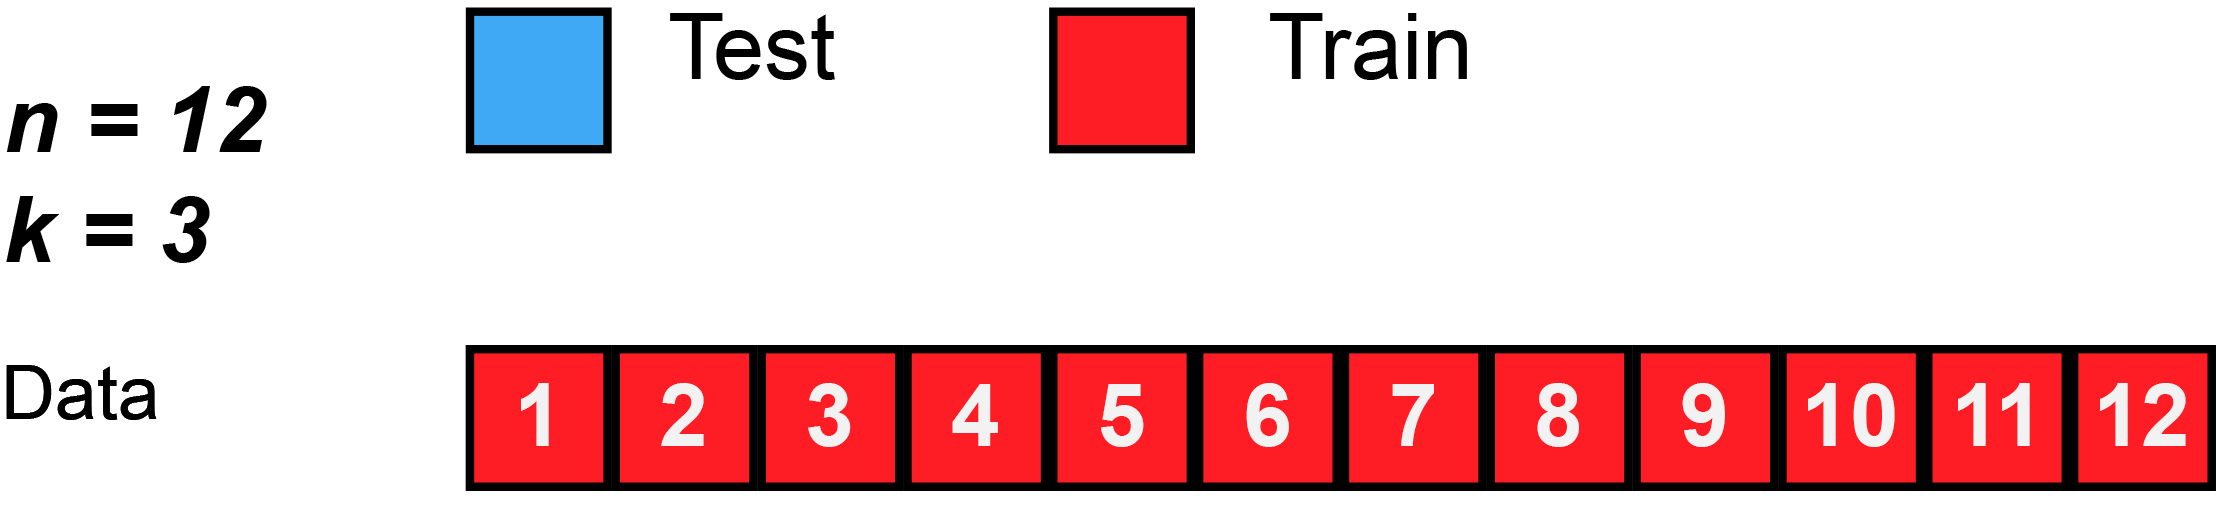

In [87]:
from h2o.estimators import H2ORandomForestEstimator
dados = h2o.import_file("https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv")
dados['SEXO'] = dados['SEXO'].asfactor()
tree =H2ORandomForestEstimator(nfolds = 5)
tree.train(['ALTURA','PESO'],'SEXO',dados)
tree.model_performance() 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0750174595934179
RMSE: 0.2738931536081505
LogLoss: 0.7048294828602404
Mean Per-Class Error: 0.09509999999999999
AUC: 0.95709966
AUCPR: 0.950291640140672
Gini: 0.91419932

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5434782608695652
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4560  440   0.088    (440.0/5000.0)
1      511   4489  0.1022   (511.0/5000.0)
Total  5071  4929  0.0951   (951.0/10000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.543478     0.90422   185
max f2                       0.130419     0.927546  339
max f0point5                 0.777778     0.91582   98
max accuracy                 0.560597     0.9051    178
max precision                1            0.974475  0
max recall                   0            1         399
max specificity              1            0.9842    0
max absolute_mcc             0.560597     0.810379  178
max min_per_class_accuracy   0.504762     0.9018    198
max mean_per_class_accuracy  0.560597     0.9051    178
max tns                      1            4921      0
max fns                      1            1984      0
max fps                      0            5000      399
max tps                      0            5000      399
max tnr                      1            0.9842    0
max fnr                      1            0.3968    0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.10 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.3095                      1                  1.94895    1.94895            0.974475         1          0.974475                    1                   0.6032          0.6032                     94.895    94.895             0.5874
2        0.4002                      0.866667           1.75083    1.90405            0.875413         0.928909   0.952024                    0.983888            0.1588          0.762                      75.0827   90.4048            0.7236
3        0.5028                      0.5                1.39181    1.79952            0.695906         0.707886   0.899761                    0.927568            0.1428          0.9048                     39.1813   79.9523            0.804
4        0.6001                      0.142857           0.608428   1.6064             0.304214         0.290858   0.803199                    0.824332            0.0592          0.964                      -39.1572  60.6399            0.7278
5        1                           0                  0.0900225  1                  0.0450113        0.0157646  0.5                         0.500986            0.036           1                          -90.9977  0                  0

In [88]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
dados = h2o.import_file("https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv")
dados['SEXO'] = dados['SEXO'].asfactor()
params = {'max_depth': [2,3,4]}
grid = H2OGridSearch(model=H2ORandomForestEstimator,hyper_params=params)
grid.train(['ALTURA','PESO'],'SEXO',dados, nfolds = 5)
print(grid.get_grid(sort_by='accuracy', decreasing=True))
grid.models[0].model_performance()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    model_ids                                                          accuracy
--  -----------  -----------------------------------------------------------------  ----------
    4            Grid_DRF_py_115_sid_a122_model_python_1664052909282_61288_model_3  0.9158
    3            Grid_DRF_py_115_sid_a122_model_python_1664052909282_61288_model_2  0.9144
    2            Grid_DRF_py_115_sid_a122_model_python_1664052909282_61288_model_1  0.9073


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06615706454802807
RMSE: 0.2572101563858396
LogLoss: 0.23113710688753308
Mean Per-Class Error: 0.0849
AUC: 0.9666028
AUCPR: 0.9622871899036286
Gini: 0.9332056

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5025365798697955
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4544  456   0.0912   (456.0/5000.0)
1      393   4607  0.0786   (393.0/5000.0)
Total  4937  5063  0.0849   (849.0/10000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.502537     0.915632  201
max f2                       0.203762     0.935453  285
max f0point5                 0.75981      0.925545  126
max accuracy                 0.555013     0.9159    187
max precision                0.985104     0.994334  6
max recall                   0.0065735    1         397
max specificity              0.992027     0.9998    0
max absolute_mcc             0.555013     0.831837  187
max min_per_class_accuracy   0.532758     0.9146    193
max mean_per_class_accuracy  0.555013     0.9159    187
max tns                      0.992027     4999      0
max fns                      0.992027     4989      0
max fps                      0.00512711   5000      399
max tps                      0.0065735    5000      397
max tnr                      0.992027     0.9998    0
max fnr                      0.992027     0.9978    0
max fpr                      0.00512711   1         399
max tpr                      0.0065735    1         397

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.02 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.01                        0.989147           1.96    1.96               0.98             0.990186    0.98                        0.990186            0.0196          0.0196                     96      96                 0.0192
2        0.02                        0.987609           2       1.98               1                0.9883      0.99                        0.989243            0.02            0.0396                     100     98                 0.0392
3        0.03                        0.98632            2       1.98667            1                0.987009    0.993333                    0.988499            0.02            0.0596                     100     98.6667            0.0592
4        0.04                        0.981916           1.96    1.98               0.98             0.984522    0.99                        0.987504            0.0196          0.0792                     96      98                 0.0784
5        0.05                        0.97826            2       1.984              1                0.97974     0.992                       0.985952            0.02            0.0992                     100     98.4               0.0984
6        0.1                         0.970985           1.96    1.972              0.98             0.974262    0.986                       0.980107            0.098           0.1972                     96      97.2               0.1944
7        0.15                        0.965855           1.972   1.972              0.986            0.968414    0.986                       0.976209            0.0986          0.2958                     97.2    97.2               0.2916
8        0.2                         0.959801           1.976   1.973              0.988          

In [89]:
from h2o.automl import H2OAutoML
dados = h2o.import_file("https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv")
dados['SEXO'] = dados['SEXO'].asfactor()
aml = H2OAutoML(max_models=6, nfolds = 5)
aml.train(['ALTURA','PESO'],'SEXO',dados)
print(aml.leaderboard.head(6))
aml.get_best_model().model_performance()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
GLM_1_AutoML_10_20220925_00046                           0.973128   0.209518  0.972897                  0.0803  0.249807  0.0624034
StackedEnsemble_AllModels_1_AutoML_10_20220925_00046     0.97307    0.209803  0.973001                  0.0805  0.2499    0.0624499
StackedEnsemble_BestOfFamily_1_AutoML_10_20220925_00046  0.973058   0.209907  0.97297                   0.0808  0.250044  0.0625222
XGBoost_1_AutoML_10_20220925_00046                       0.969406   0.223695  0.968364                  0.0909  0.257994  0.0665611
GBM_1_AutoML_10_20220925_00046                           0.968223   0.229224  0.965725                  0.0891  0.258797  0.0669758
XGBoost_2_AutoML_1

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.062306396515117816
RMSE: 0.2496124927064305
LogLoss: 0.20914173105712672
AUC: 0.9731948200000001
AUCPR: 0.9729270298359748
Gini: 0.9463896400000003
Null degrees of freedom: 9999
Residual degrees of freedom: 9997
Null deviance: 13862.943611198476
Residual deviance: 4182.834621142533
AIC: 4188.834621142533

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4779541512012287
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4577  423   0.0846   (423.0/5000.0)
1      384   4616  0.0768   (384.0/5000.0)
Total  4961  5039  0.0807   (807.0/10000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.477954     0.919614  203
max f2                       0.202295     0.938539  291
max f0point5                 0.666885     0.929515  148
max accuracy                 0.50561      0.9196    197
max precision                0.999787     1         0
max recall                   0.00188168   1         396
max specificity              0.999787     1         0
max absolute_mcc             0.50561      0.839204  197
max min_per_class_accuracy   0.496887     0.9188    199
max mean_per_class_accuracy  0.50561      0.9196    197
max tns                      0.999787     5000      0
max fns                      0.999787     4617      0
max fps                      0.000235013  5000      399
max tps                      0.00188168   5000      396
max tnr                      0.999787     1         0
max fnr                      0.999787     0.9234    0
max fpr                      0.000235013  1         399
max tpr                      0.00188168   1         396

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.00 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.01                        0.999904           2       2                  1                0.999949     1                           0.999949            0.02            0.02                       100     100                0.02
2        0.02                        0.999803           2       2                  1                0.999855     1                           0.999902            0.02            0.04                       100     100                0.04
3        0.03                        0.99964            2       2                  1                0.999732     1                           0.999846            0.02            0.06                       100     100                0.06
4        0.04                        0.999475           2       2                  1                0.999568     1                           0.999776            0.02            0.08                       100     100                0.08
5        0.05                        0.999272           2       2                  1                0.999368     1                           0.999694            0.02            0.1                        100     100                0.1
6        0.1                         0.997661           1.992   1.996              0.996            0.998554     0.998                       0.999124            0.0996          0.1996                     99.2    99.6               0.1992
7        0.15                        0.994349           1.992   1.99467            0.996            0.996196     0.997333                    0.998148            0.0996          0.2992    

- three pre-specified XGBoost GBM (Gradient Boosting Machine) models
- a fixed grid of GLMs
- a default Random Forest (DRF)
- five pre-specified H2O GBMs
- a near-default Deep Neural Net
- an Extremely Randomized Forest (XRT)
- a random grid of XGBoost GBMs
- a random grid of H2O GBMs
- a random grid of Deep Neural Nets

In [90]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_10_20220925_00046,0.973128,0.209518,0.972897,0.0803,0.249807,0.0624034
StackedEnsemble_AllModels_1_AutoML_10_20220925_00046,0.97307,0.209803,0.973001,0.0805,0.2499,0.0624499
StackedEnsemble_BestOfFamily_1_AutoML_10_20220925_00046,0.973058,0.209907,0.97297,0.0808,0.250044,0.0625222
XGBoost_1_AutoML_10_20220925_00046,0.969406,0.223695,0.968364,0.0909,0.257994,0.0665611
GBM_1_AutoML_10_20220925_00046,0.968223,0.229224,0.965725,0.0891,0.258797,0.0669758
XGBoost_2_AutoML_10_20220925_00046,0.967098,0.232744,0.965972,0.0927,0.263381,0.0693695
GBM_2_AutoML_10_20220925_00046,0.96317,0.246698,0.961084,0.0955,0.269475,0.0726168
DRF_1_AutoML_10_20220925_00046,0.960484,0.537432,0.956819,0.0957,0.270283,0.0730531
